In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.image as mpimg
import os

In [2]:
netflix = pd.read_csv('/content/netflix1.csv')

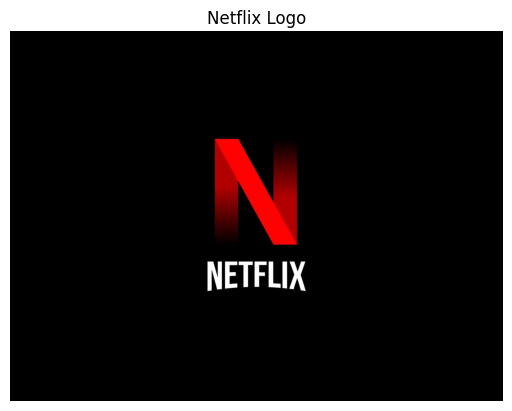

In [3]:
image_path = '/content/Netflix Logo.jpg'

if os.path.exists(image_path):
    # Load the image
    img = mpimg.imread(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off') # Hide axes
    plt.title('Netflix Logo')
    plt.show()
else:
    print(f"Error: Image file not found at {image_path}")

In [4]:
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
netflix.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object
listed_in,object


In [7]:
# Check null values
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [8]:
# Check duplicates
netflix.duplicated().sum()

np.int64(0)

In [9]:
# No of Rows and Columns
print("Number of Rows:", netflix.shape[0])
print("Number of Columns:", netflix.shape[1])

Number of Rows: 8790
Number of Columns: 10


In [10]:
# The 'listed_in' column often contains multiple genres/categories separated by commas.
# First, we need to split these strings and then count the occurrences of each individual genre.

# Split the 'listed_in' string into individual genres and flatten the list
genres = netflix['listed_in'].str.split(', ').explode()

# Get the value counts for each genre
genre_counts = genres.value_counts()

# Display the top 10 most frequent genres
print("Top 10 most frequent genres/categories:")
print(genre_counts.head(10))

Top 10 most frequent genres/categories:
listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


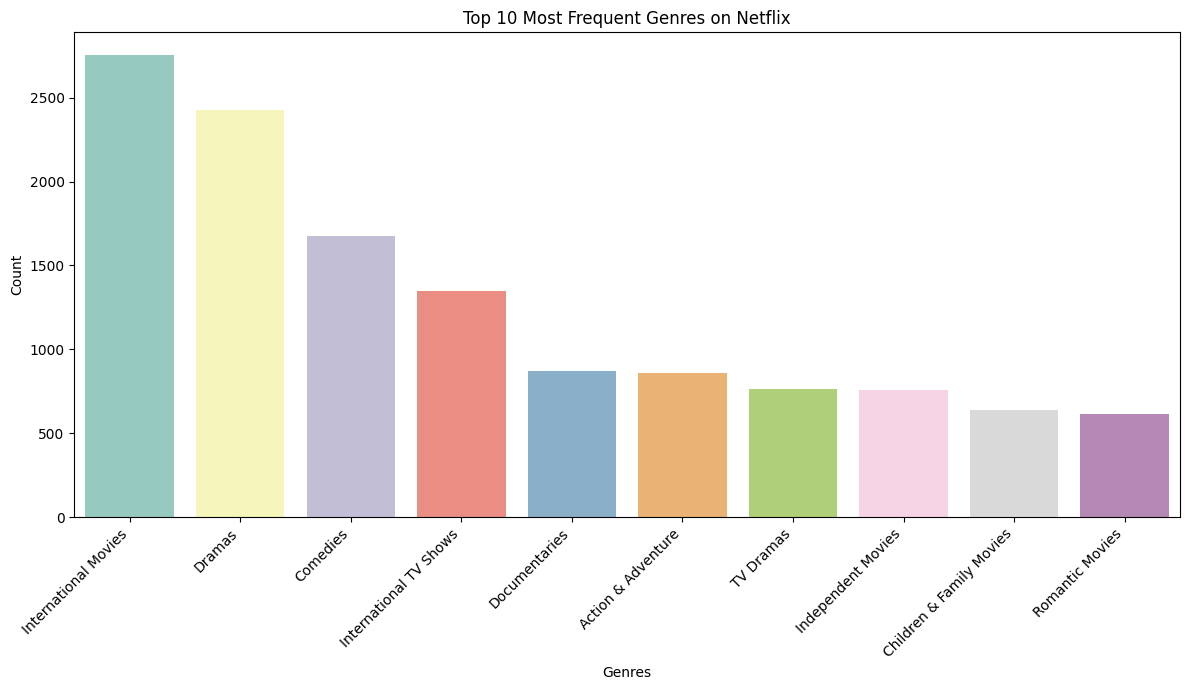

In [11]:
# Visualize the top 10 most frequent genres
plt.figure(figsize=(12, 7))
sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette='Set3')
plt.title('Top 10 Most Frequent Genres on Netflix')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Extract month and year from 'date_added'
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month

# Combine year and month to create a sortable period for plotting
netflix['date_month'] = netflix['date_added'].dt.to_period('M')

# Count the number of titles added per month
monthly_additions = netflix['date_month'].value_counts().sort_index().reset_index()
monthly_additions.columns = ['date_month', 'count']

# Convert 'date_month' back to datetime for plotting purposes
monthly_additions['date_month'] = monthly_additions['date_month'].dt.to_timestamp()

In [13]:
print("Top 10 months with highest content additions:")
display(monthly_additions.nlargest(10, 'count'))

Top 10 months with highest content additions:


,date_month,count
105,2021-07-01,257
85,2019-11-01,255
86,2019-12-01,215
104,2021-06-01,207
87,2020-01-01,205
84,2019-10-01,193
72,2018-10-01,191
102,2021-04-01,188
74,2018-12-01,185
107,2021-09-01,183


In [14]:
print("Top 10 months with lowest content additions:")
display(monthly_additions.nsmallest(10, 'count'))

Top 10 months with lowest content additions:


,date_month,count
0,2008-01-01,1
1,2008-02-01,1
2,2009-05-01,1
3,2009-11-01,1
4,2010-11-01,1
5,2011-05-01,1
6,2011-09-01,1
8,2012-02-01,1
9,2012-11-01,1
10,2012-12-01,1


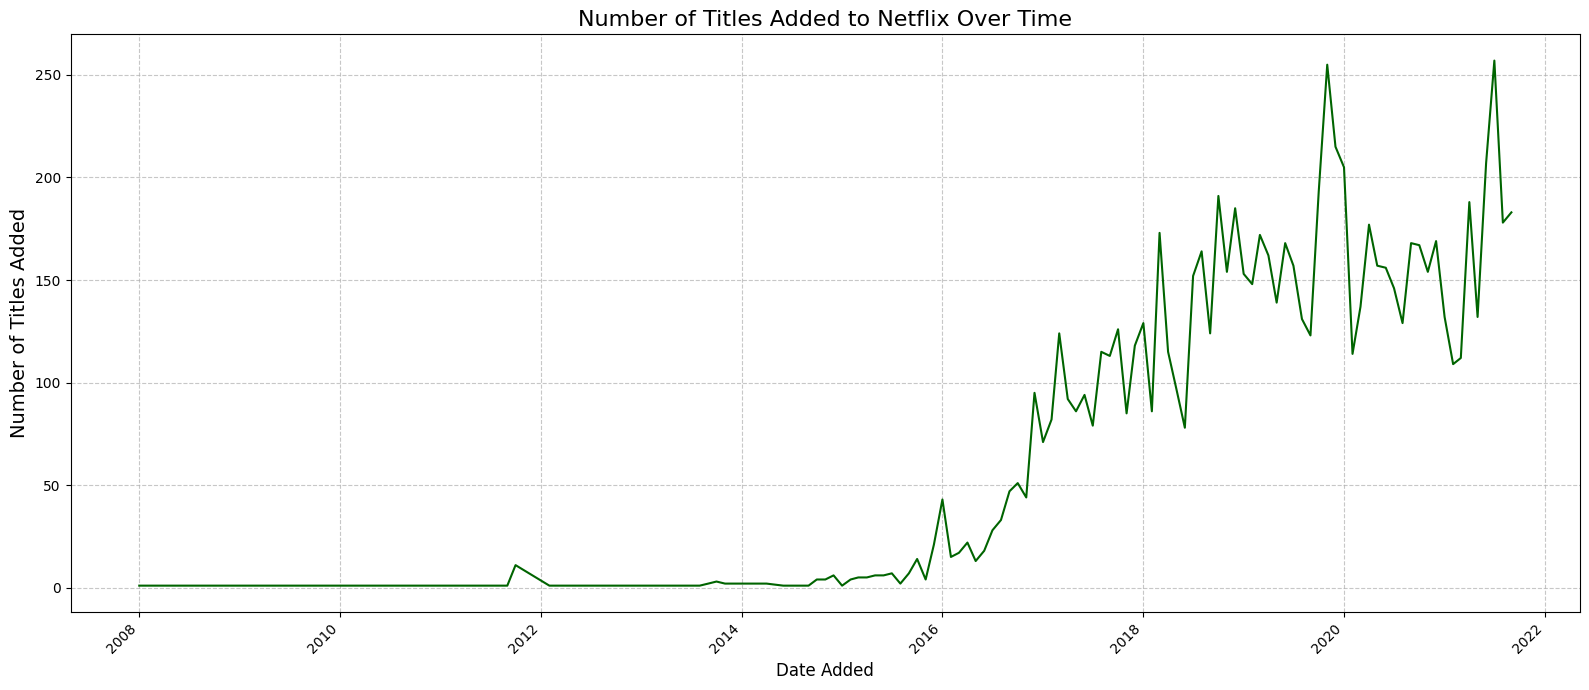

In [15]:
# Plotting the trend of content added over time
plt.figure(figsize=(16, 7))
sns.lineplot(data=monthly_additions, x='date_month', y='count', color='darkgreen')
plt.title('Number of Titles Added to Netflix Over Time', fontsize=16)
plt.xlabel('Date Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
# Get the value counts for the 'type' column
type_counts = netflix['type'].value_counts()

print("Distribution of content types on Netflix:")
display(type_counts)

Distribution of content types on Netflix:


,count
type,
Movie,6126
TV Show,2664


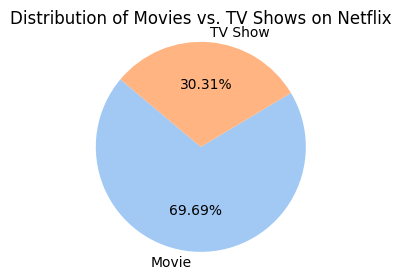

In [17]:
# Visualize the distribution of content types
plt.figure(figsize=(4,3))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.axis('equal')
plt.show()

In [18]:
# Separate movies and TV shows
movies_df = netflix[netflix['type'] == 'Movie'].copy()
tv_shows_df = netflix[netflix['type'] == 'TV Show'].copy()

# Process 'duration' for movies (extract minutes)
movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Process 'duration' for TV shows (extract seasons)
tv_shows_df['duration_seasons'] = tv_shows_df['duration'].str.replace(' Season[s]?', '', regex=True).astype(int)

print("Movies DataFrame with duration in minutes (first 5 rows):")
display(movies_df[['title', 'duration', 'duration_minutes']].head())

print("\n\nTV Shows DataFrame with duration in seasons (first 5 rows):")
display(tv_shows_df[['title', 'duration', 'duration_seasons']].head())

Movies DataFrame with duration in minutes (first 5 rows):


,title,duration,duration_minutes
0,Dick Johnson Is Dead,90 min,90
3,Confessions of an Invisible Girl,91 min,91
4,Sankofa,125 min,125
6,The Starling,104 min,104
7,Motu Patlu in the Game of Zones,87 min,87




TV Shows DataFrame with duration in seasons (first 5 rows):


,title,duration,duration_seasons
1,Ganglands,1 Season,1
2,Midnight Mass,1 Season,1
5,The Great British Baking Show,9 Seasons,9
17,Jailbirds New Orleans,1 Season,1
18,Crime Stories: India Detectives,1 Season,1


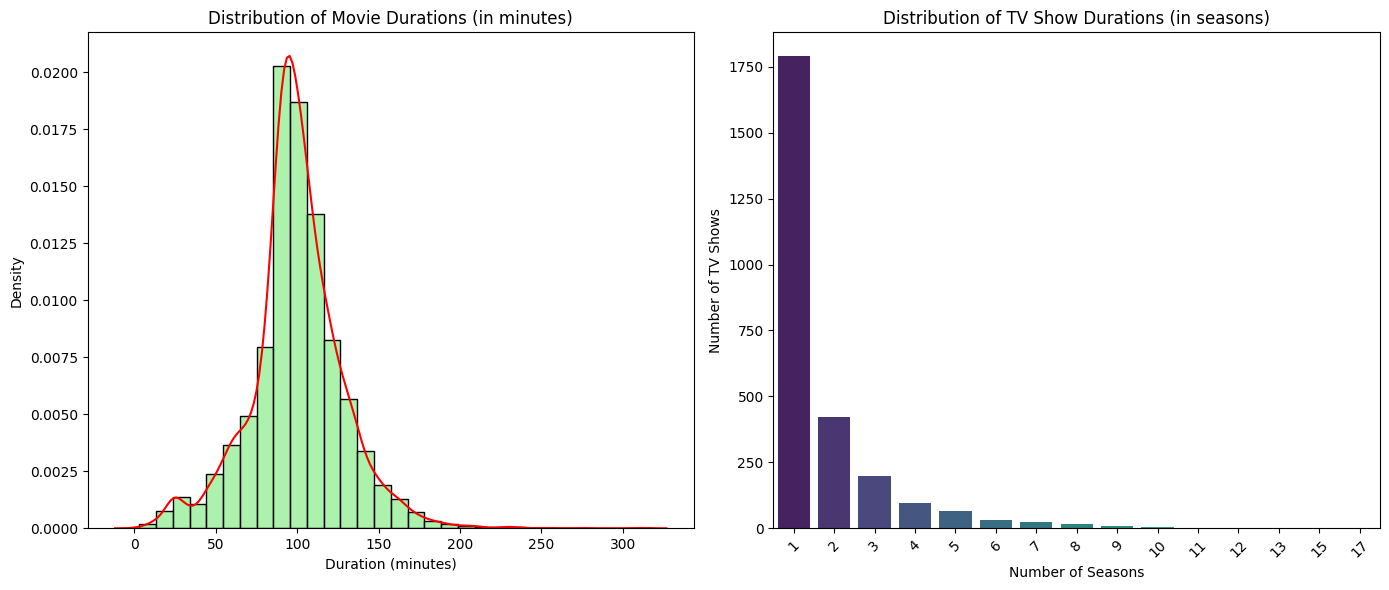

In [19]:
plt.figure(figsize=(14, 6))

# Plot distribution of Movie Durations
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(movies_df['duration_minutes'], bins=30, color='lightgreen', stat='density') # Plot histogram bars
sns.kdeplot(movies_df['duration_minutes'], color='red', ax=plt.gca()) # Overlay KDE line with specified color
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density') # Changed to Density as KDE is a density estimate

# Plot distribution of TV Show Durations (Seasons)
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.countplot(x=tv_shows_df['duration_seasons'], palette='viridis')
plt.title('Distribution of TV Show Durations (in seasons)')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [20]:
tv_shows_more_than_5_seasons = tv_shows_df[tv_shows_df['duration_seasons'] > 5]
number_of_tv_shows_more_than_5_seasons = len(tv_shows_more_than_5_seasons)

print(f"Number of TV shows with more than 5 seasons: {number_of_tv_shows_more_than_5_seasons}")

Number of TV shows with more than 5 seasons: 96


In [21]:
# Get the value counts for the 'director' column in movies_df
movie_director_counts = movies_df['director'].value_counts()

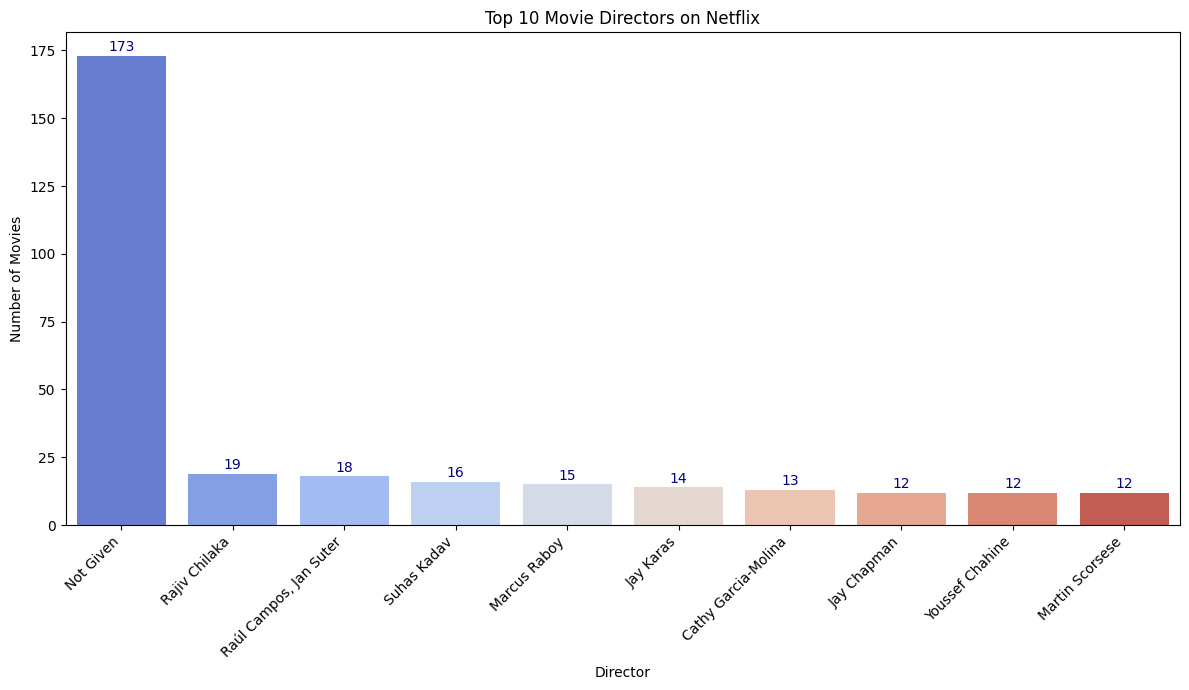

In [22]:
# Visualize the top 10 movie directors
plt.figure(figsize=(12, 7))
sns.barplot(x=movie_director_counts.head(10).index, y=movie_director_counts.head(10).values, palette='coolwarm')
plt.title('Top 10 Movie Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')

# Add count numbers on top of each bar
for index, value in enumerate(movie_director_counts.head(10).values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', color='navy')

plt.tight_layout()
plt.show()

In [23]:
# Extract genres for movies
movie_genres = movies_df['listed_in'].str.split(', ').explode()
movie_genre_counts = movie_genres.value_counts()

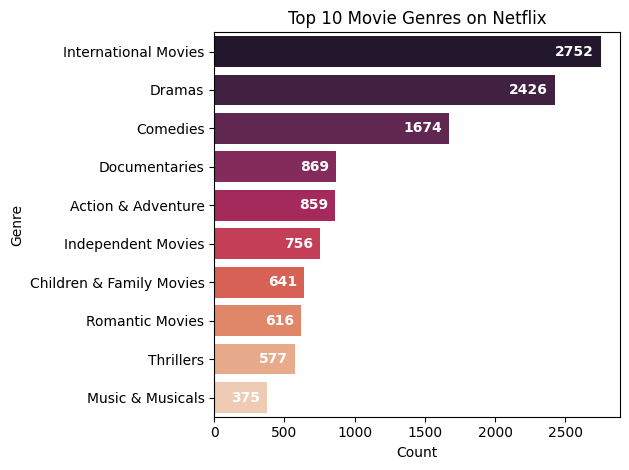

In [24]:
# Plot for Movie Genres
ax1 = sns.barplot(x=movie_genre_counts.head(10).values, y=movie_genre_counts.head(10).index, palette='rocket')
plt.title('Top 10 Movie Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
# Add count numbers inside the bars for Movie Genres
for p in ax1.patches:
    width = p.get_width()
    plt.text(width - 50, p.get_y() + p.get_height()/2, f'{int(width)}', va='center', ha='right', color='white', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

In [25]:
# Extract genres for TV shows
tv_show_genres = tv_shows_df['listed_in'].str.split(', ').explode()
tv_show_genre_counts = tv_show_genres.value_counts()

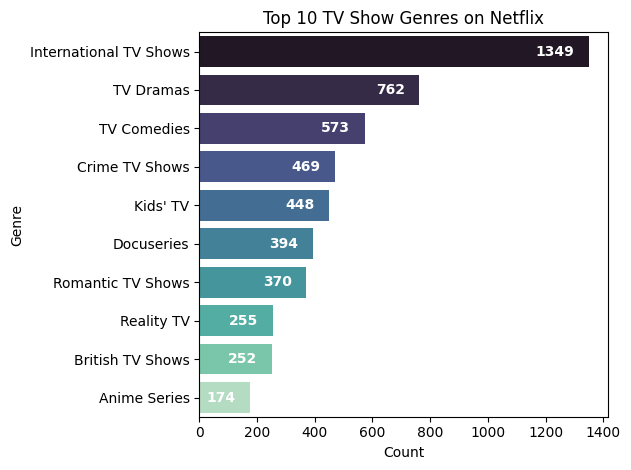

In [26]:
# Plot for TV Show Genres
ax2 = sns.barplot(x=tv_show_genre_counts.head(10).values, y=tv_show_genre_counts.head(10).index, palette='mako')
plt.title('Top 10 TV Show Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
# Add count numbers inside the bars for TV Show Genres
for p in ax2.patches:
    width = p.get_width()
    plt.text(width - 50, p.get_y() + p.get_height()/2, f'{int(width)}', va='center', ha='right', color='white', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

In [27]:
# Calculate the duration between release_year and year_added
# 'year_added' was already created from 'date_added'
netflix['years_taken_to_add_from_release_year'] = netflix['year_added'] - netflix['release_year']

print("First 5 rows with years_taken_to_add_from_release_year column:")
display(netflix[['title', 'release_year', 'year_added', 'years_taken_to_add_from_release_year']].head())

First 5 rows with years_taken_to_add_from_release_year column:


,title,release_year,year_added,years_taken_to_add_from_release_year
0,Dick Johnson Is Dead,2020,2021,1
1,Ganglands,2021,2021,0
2,Midnight Mass,2021,2021,0
3,Confessions of an Invisible Girl,2021,2021,0
4,Sankofa,1993,2021,28


In [28]:
print("Top 10 records with the highest years taken to add from release year:")
display(netflix.nlargest(10, 'years_taken_to_add_from_release_year')[['title', 'release_year', 'year_added', 'years_taken_to_add_from_release_year']])

Top 10 records with the highest years taken to add from release year:


,title,release_year,year_added,years_taken_to_add_from_release_year
421,Pioneers: First Women Filmmakers*,1925,2018,93
6874,Five Came Back: The Reference Films,1945,2021,76
5698,Prelude to War,1942,2017,75
6037,The Battle of Midway,1942,2017,75
6422,Undercover: How to Operate Behind Enemy Lines,1943,2017,74
6491,Why We Fight: The Battle of Russia,1943,2017,74
6510,WWII: Report from the Aleutians,1943,2017,74
6218,The Memphis Belle: A Story of a\nFlying Fortress,1944,2017,73
6230,The Negro Soldier,1944,2017,73
6406,Tunisian Victory,1944,2017,73


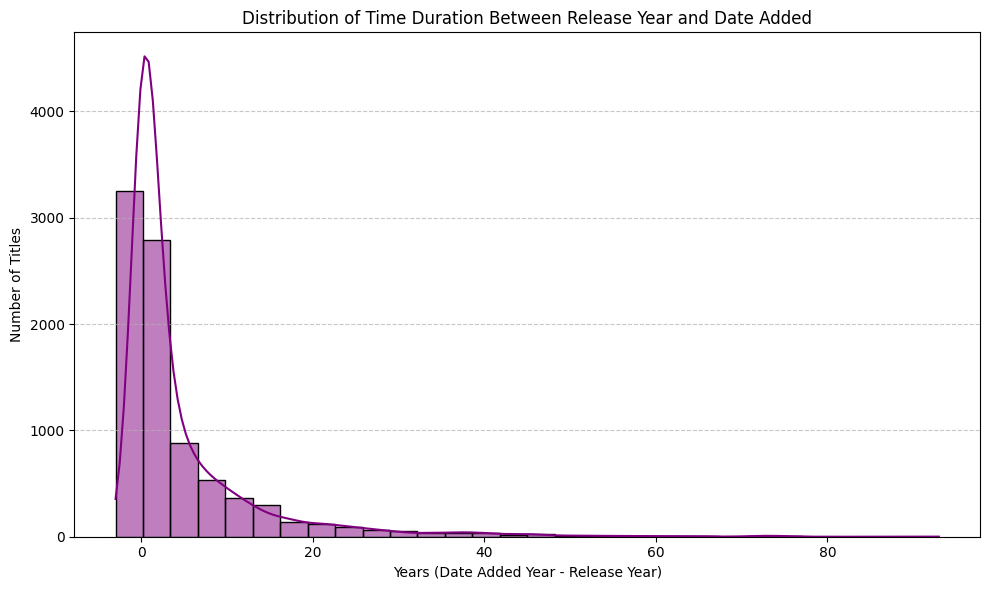

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix['years_taken_to_add_from_release_year'], bins=30, kde=True, color='purple', line_kws={'color': 'darkred'})
plt.title('Distribution of Time Duration Between Release Year and Date Added')
plt.xlabel('Years (Date Added Year - Release Year)')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
# Get the value counts for the 'director' column in tv_shows_df
tv_show_director_counts = tv_shows_df['director'].value_counts()

print("Top 10 directors by number of TV shows:")
display(tv_show_director_counts.head(10))

Top 10 directors by number of TV shows:


,count
director,
Not Given,2415
Alastair Fothergill,14
"Mark Thornton, Todd Kauffman",5
Stan Lathan,3
Hsu Fu-chun,2
Rob Seidenglanz,2
Ken Burns,2
Shin Won-ho,2
Iginio Straffi,2


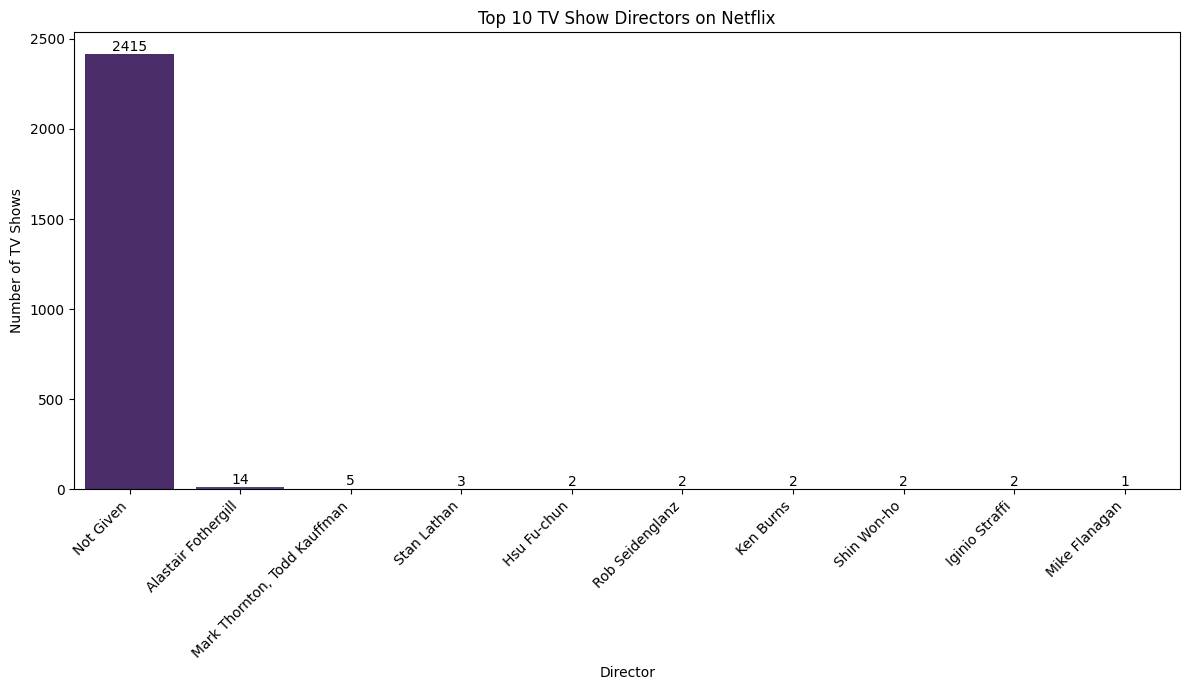

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top 10 TV show directors
plt.figure(figsize=(12, 7))
sns.barplot(x=tv_show_director_counts.head(10).index, y=tv_show_director_counts.head(10).values, palette='viridis')
plt.title('Top 10 TV Show Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')

# Add count numbers on top of each bar
for index, value in enumerate(tv_show_director_counts.head(10).values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()